# Bagging Machine Learning Algorithm

### **B**ootstrap **Agg**regat**ing** or [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)
* [Scikit- Learn Reference](http://scikit-learn.org/stable/modules/ensemble.html#bagging)
* Bootstrap sampling: Sampling with replacement
* Combine by averaging the output (regression)
* Combine by voting (classification)
* Can be applied to many classifiers which includes ANN, CART, etc.

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
#df = sns.load_dataset('titanic')
df = pd.read_csv('titanic.csv')

In [4]:
df.shape

(891, 15)

In [5]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [6]:
df.dropna(inplace=True)

In [7]:
df['pclass'].unique()

array([1, 3, 2], dtype=int64)

In [8]:
df['pclass'].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

In [9]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
df['sex'].value_counts()

male      94
female    88
Name: sex, dtype: int64

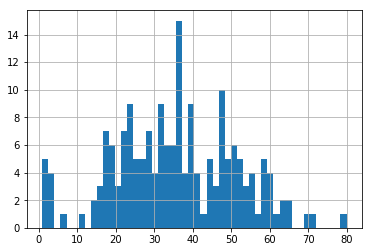

In [11]:
df['age'].hist(bins=50);

## Data Pre-processing

In [12]:
X = df[['pclass', 'sex', 'age']]

In [13]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [14]:
X['sex'] = lb.fit_transform(X['sex'])

C:\Users\N35457.US\AppData\Roaming\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
X.head()

pclass  sex   age
1        1    0  38.0
3        1    0  35.0
6        1    1  54.0
10       3    0   4.0
11       1    0  58.0

In [16]:
X.shape

(182, 3)

In [17]:
X.describe()

pclass         sex         age
count  182.000000  182.000000  182.000000
mean     1.192308    0.516484   35.623187
std      0.516411    0.501107   15.671615
min      1.000000    0.000000    0.920000
25%      1.000000    0.000000   24.000000
50%      1.000000    1.000000   36.000000
75%      1.000000    1.000000   47.750000
max      3.000000    1.000000   80.000000

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 3 columns):
pclass    182 non-null int64
sex       182 non-null int32
age       182 non-null float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 10.0 KB


In [19]:
y = df['survived']

In [20]:
y.value_counts()

1    123
0     59
Name: survived, dtype: int64

# Fit Model

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

## Decision Tree

In [26]:
clf = DecisionTreeClassifier(random_state=42)

In [27]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [28]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9449

Classification Report: 
              precision    recall  f1-score   support

          0       0.89      0.95      0.92        41
          1       0.98      0.94      0.96        86

avg / total       0.95      0.94      0.95       127


Confusion Matrix: 
 [[39  2]
 [ 5 81]]

Average Accuracy: 	 0.7690
Accuracy SD: 		 0.0888


In [29]:
print_score(clf, X_train, y_train, X_test, y_test, train=False) # Test

Test Result:

accuracy score: 0.7455

Classification Report: 
              precision    recall  f1-score   support

          0       0.60      0.67      0.63        18
          1       0.83      0.78      0.81        37

avg / total       0.75      0.75      0.75        55


Confusion Matrix: 
 [[12  6]
 [ 8 29]]



***

## Bagging (oob_score=False)

In [39]:
#bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
#                            bootstrap=True, n_jobs=-1,
#                            random_state=42)

bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=5000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [40]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5000, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [41]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9449

Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.90      0.91        41
          1       0.95      0.97      0.96        86

avg / total       0.94      0.94      0.94       127


Confusion Matrix: 
 [[37  4]
 [ 3 83]]

Average Accuracy: 	 0.8088
Accuracy SD: 		 0.0699


In [42]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7273

Classification Report: 
              precision    recall  f1-score   support

          0       0.59      0.56      0.57        18
          1       0.79      0.81      0.80        37

avg / total       0.72      0.73      0.73        55


Confusion Matrix: 
 [[10  8]
 [ 7 30]]



***

## Bagging (oob_score=True)

Use out-of-bag samples to estimate the generalization accuracy

In [43]:
#bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
#                            bootstrap=True, oob_score=True,
#                            n_jobs=-1, random_state=42)

bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=5000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)

In [44]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5000, n_jobs=-1, oob_score=True,
         random_state=42, verbose=0, warm_start=False)

In [45]:
bag_clf.oob_score_

0.80314960629921262

In [46]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9449

Classification Report: 
              precision    recall  f1-score   support

          0       0.93      0.90      0.91        41
          1       0.95      0.97      0.96        86

avg / total       0.94      0.94      0.94       127


Confusion Matrix: 
 [[37  4]
 [ 3 83]]

Average Accuracy: 	 0.8088
Accuracy SD: 		 0.0699


In [47]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7273

Classification Report: 
              precision    recall  f1-score   support

          0       0.59      0.56      0.57        18
          1       0.79      0.81      0.80        37

avg / total       0.72      0.73      0.73        55


Confusion Matrix: 
 [[10  8]
 [ 7 30]]



***